## Tuning the Model

In [68]:
import numpy as np
import pandas as pd
import os
import sys

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.feature_extraction.text import TfidfVectorizer

In [70]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/twitter-data/master/twitter30k_cleaned.csv')
df

,twitts,sentiment
0,robbiebronniman sounds like a great night,1
1,damn the person who stolde my wallet may karma...,1
2,greetings from the piano bench photo,1
3,drewryanscott i love it i love you haha forget...,1
4,kissthestars pretty pretty pretty please pakid...,0
...,...,...
29995,calumfan1 is it in any way related to photoshop,0
29996,swiz_nz really wow thats crap,0
29997,at the 2010 lexus hs250h press event again can...,0
29998,karmicunderpath ooh now there is a nice thought,1


In [71]:
X = df['twitts']
y = df['sentiment']

In [72]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X)

In [73]:
X

<30000x42126 sparse matrix of type '<class 'numpy.float64'>'
	with 350520 stored elements in Compressed Sparse Row format>

In [74]:
len(tfidf.vocabulary_)

42126

In [75]:
X.shape, y.shape

((30000, 42126), (30000,))

In [76]:
type(X), type(y)

(scipy.sparse.csr.csr_matrix, pandas.core.series.Series)

##  Non-Negative Matrix Factorization (NMF)

In [77]:
from sklearn.decomposition import NMF

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [79]:
%%time
nmf = NMF(n_components=50, random_state=0)
X_train_nmf = nmf.fit_transform(X_train)

Wall time: 28.7 s


In [80]:
X_train.shape, X_train_nmf.shape

((24000, 42126), (24000, 50))

In [81]:
def run_svm(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print()
    print('Printing Report')
    print(classification_report(y_test, y_pred))

In [82]:
X_test_nmf = nmf.transform(X_test)

# Gave Random C value to see the impact of tuning

In [83]:
%%time
clf = LinearSVC(C = 0.000000004)
run_svm(clf, X_train_nmf, X_test_nmf, y_train, y_test)


Printing Report
              precision    recall  f1-score   support

           0       0.57      0.87      0.69      3000
           1       0.72      0.34      0.46      3000

    accuracy                           0.60      6000
   macro avg       0.64      0.60      0.57      6000
weighted avg       0.64      0.60      0.57      6000

Wall time: 43.2 ms


## Hyperparameters Tuning

## Hyperparameter Tuning Methods

- Grid Search
- Random Search

# Grid Search in Keras : https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

The following procedure is followed for each of the k “folds”:

- A test set is held out for final evaluation
- In the basic approach the training set is split into k smaller sets. 
- A model is trained using  of the folds as training data;
- the resulting model is validated on the remaining part of the data.
- The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop
- The simplest way to use cross-validation is to call the cross_val_score helper function on the estimator and the dataset.

## GridSearch for Logistic Regression Hyperparameters Tuning 

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [85]:
train = X_train_nmf.copy()
test = X_test_nmf.copy()

In [86]:
model = LogisticRegression(solver = 'liblinear')

In [87]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
max_iter = [100, 500]

In [88]:
hyperparameters = dict(penalty=penalty, C = C, max_iter = max_iter)

In [89]:
clf = GridSearchCV(model, hyperparameters, cv = 5, n_jobs=-1)

In [53]:
tunedModel = clf.fit(train, y_train)

In [54]:
tunedModel.best_estimator_

LogisticRegression(C=2.7825594022071245, penalty='l1', solver='liblinear')

In [58]:
bestClassifier = tunedModel.best_estimator_
bestClassifier

LogisticRegression(C=2.7825594022071245, penalty='l1', solver='liblinear')

In [59]:
tunedModel.best_params_

{'C': 2.7825594022071245, 'max_iter': 100, 'penalty': 'l1'}

In [60]:
bestClassifier.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=2.7825594022071245, penalty='l1', solver='liblinear')>

In [56]:
tunedModel.best_score_

0.6538333333333333

In [61]:
y_pred = bestClassifier.predict(test)

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.62      0.64      3000
           1       0.64      0.68      0.66      3000

    accuracy                           0.65      6000
   macro avg       0.65      0.65      0.65      6000
weighted avg       0.65      0.65      0.65      6000



In [91]:
y_pred = tunedModel.predict(test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.62      0.64      3000
           1       0.64      0.68      0.66      3000

    accuracy                           0.65      6000
   macro avg       0.65      0.65      0.65      6000
weighted avg       0.65      0.65      0.65      6000



## GridSearch for SVM Hyperparameters Tuning 

SVM have following hyperparamters
- C
- gamma
- kernel
- degree

In [53]:
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")


from sklearn import datasets
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [56]:
# Set the parameters by cross-validation
hyperparameters = [
    {'kernel': ['rbf'],
     'gamma': [1e-1, 1e-2],
     'C': [1, 10],
     'degree': [2, 3]},
                   
    {'kernel': ['linear'],
     'C': [1, 10]}]

In [57]:
scores = ['precision', 'recall']

def run_tuning(model, hyperparameters, scores):
    for score in scores:
        print("Tuning hyperparamters for %s" % score)
        print()
        
        clf = GridSearchCV(model, hyperparameters, scoring='%s_macro' % score, cv = 5, n_jobs = -1)
        clf.fit(X_train, y_train)
        
        print('Best parameters set found: ')
        print()
        print(clf.best_params_)
        print()
        
        print('Grid scores in process: ')
        print()
        means = clf.cv_results_['mean_test_score']
        
        for mean, params in zip(means, clf.cv_results_['params']):
            print('%0.3f for %r' % (mean, params))
            
        print()
        print()
        
        print('Detailed Classification Report')
        y_pred = clf.predict(X_test)
        print(classification_report(y_test, y_pred))
        print()
        
        

In [58]:
run_tuning(SVC(), hyperparameters, scores)

Tuning hyperparamters for precision

Best parameters set found: 

{'C': 1, 'kernel': 'linear'}

Grid scores in process: 

0.946 for {'C': 1, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
0.910 for {'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
0.946 for {'C': 1, 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf'}
0.910 for {'C': 1, 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf'}
0.968 for {'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
0.955 for {'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
0.968 for {'C': 10, 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf'}
0.955 for {'C': 10, 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf'}
0.978 for {'C': 1, 'kernel': 'linear'}
0.951 for {'C': 10, 'kernel': 'linear'}


Detailed Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                        

## Grid Search for Random Forest

Hyperparameter tuning relies more on experimental results than theory, and thus the best method to determine the optimal settings is to try many different combinations evaluate the performance of each model.

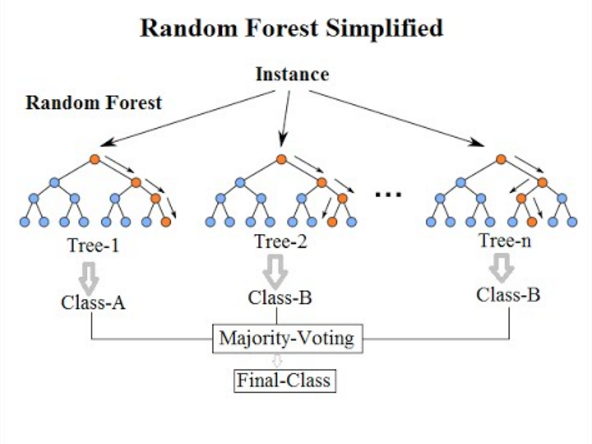


Source: Wikipedia

For a Random Forest Classifier, there are several different hyperparameters that can be adjusted. We will be adjusting there params.

- **n_estimators:** The n_estimators parameter specifies the number of trees in the forest of the model. The default value for this parameter is 10, which means that 10 different decision trees will be constructed in the random forest.
- **max_depth:** The max_depth parameter specifies the maximum depth of each tree. The default value for max_depth is None, which means that each tree will expand until every leaf is pure. A pure leaf is one where all of the data on the leaf comes from the same class.
- **min_samples_split:** The min_samples_split parameter specifies the minimum number of samples required to split an internal leaf node. The default value for this parameter is 2, which means that an internal node must have at least two samples before it can be split to have a more specific classification.
- **min_samples_leaf:** The min_samples_leaf parameter specifies the minimum number of samples required to be at a leaf node. The default value for this parameter is 1, which means that every leaf must have at least 1 sample that it classifies.
- **max_features** This parameter will decide how many features will be used in classification

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [66]:
scores = ['precision', 'recall']

hyperparameters = {
    'bootstrap': [True],
    'max_depth': [10, 100],
    'max_features': [2, 3, X.shape[1]],
    'min_samples_leaf': [2, 5],
    'n_estimators': [10, 100, 200]
}

In [67]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [68]:
rfc = RandomForestClassifier(n_jobs=-1)
run_tuning(rfc, hyperparameters, scores)

Tuning hyperparamters for precision

Best parameters set found: 

{'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 5, 'n_estimators': 10}

Grid scores in process: 

0.944 for {'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 10}
0.951 for {'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 100}
0.951 for {'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 200}
0.959 for {'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 5, 'n_estimators': 10}
0.942 for {'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 5, 'n_estimators': 100}
0.951 for {'bootstrap': True, 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 5, 'n_estimators': 200}
0.942 for {'bootstrap': True, 'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 2, 'n_estimators': 10}
0.951 for {'bootstrap': True, 'max_depth'

## Random Search for Best Parameter Selection

With RandomizedSearchCV, if we specify a distribution, scikit-learn will randomly sample without replacement hyperparameter values from that distribution.

In [70]:
# from sklearn.utils.fixes import loguniform
from scipy.stats import uniform, loguniform
from sklearn.model_selection import RandomizedSearchCV


In [74]:
C = uniform(loc=0, scale=4)
gamma = loguniform(1e-5, 1e-1)
 
hyperparameters = dict(C=C, gamma=gamma)

In [75]:
hyperparameters

{'C': <scipy.stats._distn_infrastructure.rv_frozen at 0x1c216bc5b88>,
 'gamma': <scipy.stats._distn_infrastructure.rv_frozen at 0x1c215ccff48>}

In [76]:
clf = RandomizedSearchCV(SVC(), hyperparameters, cv = 5, n_jobs=-1)

In [77]:
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C216BC5B88>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C215CCFF48>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [78]:
clf.best_params_

{'C': 2.7899807903692477, 'gamma': 0.04604970797505251}

In [79]:
clf.best_score_

0.95

In [80]:
y_pred = clf.predict(X_test)

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Selecting Best Models from Multiple ML Algorithms

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [83]:
np.random.seed(0)

In [84]:
pipe = Pipeline([("classifier", RandomForestClassifier())])

search_space = [{"classifier": [LogisticRegression(solver='liblinear')],
                  "classifier__penalty": ['l1', 'l2'],
                  "classifier__C": np.logspace(0, 4, 10)},
                
                {"classifier": [RandomForestClassifier(n_jobs=-1)],
                  "classifier__n_estimators": [10, 100],
                  "classifier__max_features": [1, 3]},
                
                  {"classifier": [SVC()],
                  "classifier__C": [1, 5],
                  "classifier__gamma": [1e-1, 1e-2]}]

In [85]:
clf = GridSearchCV(pipe, search_space, cv = 5, n_jobs = -1)


In [86]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('classifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
               

In [87]:
clf.best_estimator_

Pipeline(memory=None,
         steps=[('classifier',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.1,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [88]:
clf.best_params_

{'classifier': SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 'classifier__C': 5,
 'classifier__gamma': 0.1}